In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD
# Plot
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

path = '/content/drive/My Drive/Colab Notebooks/Mini-Projet/sensor_data_processed_normalizing_the_label_with_hot_encoding_index.csv'



In [4]:
data = pd.read_csv(path)

In [5]:
columns =['bedroom_switch_middle_left',
 'entrance_heater_effective_setpoint',
 'bedroom_switch_middle_right',
 'kitchen_noise',
 'livingroom_couch_plug_consumption',
 'global_snow_ext',
 'bedroom_heater1_effective_setpoint',
 'global_lighting_power',
 'livingroom_heater2_base_setpoint',
 'kitchen_dishwasher_current',
 'toilet_coldwater_total',
 'kitchen_hood_voltage',
 'kitchen_washingmachine_partial_energy',
 'walkway_switch2_bottom_left',
 'livingroom_shutter5',
 'kitchen_hood_total_energy',
 'bathroom_heater_command',
 'walkway_noise',
 'entrance_noise',
 'livingroom_shutter4',
 'livingroom_switch2_top_left',
 'global_rain_ext',
 'global_wind_speed_ext',
 'global_waterheater_total_energy',
 'global_lighting_current',
 'livingroom_heater2_temperature',
 'livingroom_tv_status',
 'office_tv_plug_consumption',
 'kitchen_fridge_power',
 'bedroom_closet_door',
 'bathroom_luminosity',
 'livingroom_tv_plug_consumption',
 'office_AC_setpoint',
 'bathroom_switch_bottom_right',
 'bedroom_light4',
 'office_heater_effective_mode',
 'global_lighting_total_energy',
 'kitchen_cupboard3',
 'toilet_switch_left',
 'entrance_heater_base_setpoint',
 'office_heater_command',
 'bedroom_light2',
 'livingroom_table_luminosity',
 'global_voltage',
 'bedroom_temperature',
 'kitchen_fridge_door',
 'bathroom_sink_coldwater_total',
 'global_lighting_partial_energy',
 'livingroom_couch_noise',
 'global_temperature_feel_ext',
 'livingroom_humidity',
 'kitchen_oven_current',
 'livingroom_presence_table',
 'bathroom_switch_bottom_left',
 'livingroom_heater1_command',
 'staircase_light',
 'office_noise',
 'kitchen_sink_hotwater_total',
 'bathroom_switch_top_right',
 'bedroom_switch_bottom_left',
 'livingroom_presence_couch',
 'livingroom_heater2_effective_setpoint',
 'bedroom_presence',
 'toilet_switch_right',
 'bedroom_humidity',
 'livingroom_heater1_effective_mode',
 'bedroom_heater2_effective_setpoint',
 'livingroom_heater2_command',
 'bedroom_shutter1',
 'global_active_power',
 'walkway_switch1_bottom_left',
 'kitchen_hood_current',
 'entrance_heater_temperature',
 'bedroom_CO2',
 'livingroom_table_plug_consumption',
 'bathroom_CO2',
 'bathroom_temperature',
 'bedroom_drawer1',
 'office_switch_right',
 'global_heaters_temperature',
 'global_waterheater_current',
 'kitchen_dishwasher_voltage',
 'global_shutters_voltage',
 'walkway_switch1_bottom_right',
 'livingroom_heater1_effective_setpoint',
 'livingroom_light1',
 'bathroom_heater_temperature',
 'kitchen_cooktop_current',
 'entrance_switch_left',
 'toilet_coldwater_instantaneous',
 'kitchen_oven_voltage',
 'bathroom_sink_hotwater_instantaneous',
 'staircase_switch_right',
 'kitchen_sink_coldwater_instantaneous',
 'livingroom_heater2_effective_mode',
 'office_tv_status',
 'global_shutters_current',
 'kitchen_fridge_current',
 'kitchen_washingmachine_total_energy',
 'bedroom_shutter2',
 'bathroom_light2',
 'global_waterheater_partial_energy',
 'global_frequency',
 'kitchen_switch_bottom_right',
 'bedroom_door',
 'kitchen_luminosity',
 'bedroom_heater2_command',
 'entrance_heater_command',
 'global_pressure_ext',
 'kitchen_oven_partial_energy',
 'global_shutters_power',
 'office_luminosity',
 'kitchen_cooktop_total_energy',
 'kitchen_washingmachine_voltage',
 'bathroom_light1',
 'bedroom_luminosity',
 'office_presence',
 'bathroom_heater_effective_setpoint',
 'bathroom_shower_hotwater_instantaneous',
 'livingroom_switch1_top_left',
 'bathroom_humidity',
 'kitchen_cupboard5',
 'bathroom_shower_coldwater_total',
 'bathroom_shower_coldwater_instantaneous',
 'office_window',
 'kitchen_switch_bottom_left',
 'kitchen_dishwasher_partial_energy',
 'kitchen_fridge_voltage',
 'office_heater_effective_setpoint',
 'office_heater_temperature',
 'livingroom_window1',
 'bathroom_sink_hotwater_total',
 'kitchen_cooktop_voltage',
 'kitchen_hood_power',
 'kitchen_sink_hotwater_instantaneous',
 'global_current',
 'global_condition_id_ext',
 'livingroom_switch1_top_right',
 'office_AC_mode',
 'bedroom_heater2_effective_mode',
 'walkway_light',
 'bathroom_door',
 'global_clouds_ext',
 'global_shutters_total_energy',
 'bedroom_heater1_effective_mode',
 'bedroom_light1',
 'kitchen_cupboard1',
 'livingroom_temperature',
 'livingroom_CO2',
 'global_shutters_partial_energy',
 'bathroom_shower_hotwater_total',
 'kitchen_switch_top_right',
 'kitchen_cooktop_partial_energy',
 'global_waterheater_power',
 'kitchen_sink_coldwater_total',
 'kitchen_oven_total_energy',
 'global_power_factor',
 'kitchen_washingmachine_current',
 'global_coldwater_instantaneous',
 'office_desk_plug_consumption',
 'livingroom_switch1_bottom_left',
 'entrance_door',
 'global_active_energy',
 'global_coldwater_total',
 'bathroom_heater_effective_mode',
 'office_light',
 'walkway_switch1_top_right',
 'global_humidity_ext',
 'livingroom_AC_setpoint',
 'walkway_switch2_top_right',
 'bathroom_switch_top_left',
 'kitchen_cupboard2',
 'office_heater_base_setpoint',
 'bedroom_light3',
 'kitchen_dishwasher_total_energy',
 'livingroom_shutter3',
 'kitchen_light2',
 'kitchen_cooktop_power',
 'office_switch_left',
 'toilet_light',
 'livingroom_shutter2',
 'bathroom_presence',
 'livingroom_light2',
 'bedroom_switch_top_right',
 'livingroom_heater1_temperature',
 'bedroom_switch_top_left',
 'walkway_switch1_top_left',
 'livingroom_switch2_top_right',
 'walkway_switch2_bottom_right',
 'kitchen_dishwasher_power',
 'global_heaters_setpoint',
 'bedroom_AC_setpoint',
 'kitchen_temperature',
 'bedroom_heater2_temperature',
 'kitchen_fridge_partial_energy',
 'bedroom_switch_bottom_right',
 'office_shutter',
 'bedroom_drawer2',
 'global_temperature_ext',
 'bedroom_heater1_command',
 'bathroom_heater_base_setpoint',
 'bedroom_bed_pressure',
 'livingroom_table_noise',
 'global_lighting_voltage',
 'office_switch_middle',
 'global_gas_total',
 'global_waterheater_status',
 'office_door',
 'kitchen_washingmachine_power',
 'staircase_switch_left',
 'bedroom_heater2_base_setpoint',
 'entrance_heater_effective_mode',
 'bedroom_heater1_temperature',
 'entrance_light1',
 'livingroom_shutter1',
 'livingroom_heater1_base_setpoint',
 'kitchen_CO2',
 'walkway_switch2_top_left',
 'kitchen_switch_top_left',
 'kitchen_fridge_total_energy',
 'bathroom_shower_door',
 'bedroom_heater1_base_setpoint',
 'kitchen_light1',
 'kitchen_hood_partial_energy',
 'global_waterheater_voltage',
 'kitchen_cupboard4',
 'bathroom_sink_coldwater_instantaneous',
 'bedroom_noise',
 'kitchen_humidity',
 'kitchen_oven_power',
 'kitchen_presence',
 'livingroom_luminosity',
 'E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'down',
 'equal',
 'up',
 'Couvert',
 'brouillard',
 'brume',
 'ensoleillé',
 'légères pluies',
 'nuageux',
 'partiellement ensoleillé',
 'peu nuageux',
 'cloudy',
 'few-showers',
 'fog',
 'mostly-cloudy-day',
 'partly-cloudy-day',
 'sunny']

In [6]:
labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [7]:
X = data[columns]
y = data[labels]
y = y.values
X = X.values

In [8]:
def reverse_onehot(encoded_seq):
    return [np.argmax(vector) for vector in encoded_seq]

In [9]:
y_reverse_onehot = reverse_onehot(y)

In [10]:
# Define feature selection
from sklearn.feature_selection import f_classif,SelectKBest 
from sklearn.feature_selection import VarianceThreshold
import math


# X is your feature matrix
# y is your target variable

# Create a VarianceThreshold transformer to remove zero-variance features
vt = VarianceThreshold()
# Fit the transformer on the feature matrix X to learn the feature variances
vt.fit(X)
# Transform the feature matrix X to remove zero-variance features
X_vt = vt.transform(X)
# Create a SelectKBest transformer to select the top k features based on the F-test
fs = SelectKBest(score_func=f_classif, k=225)
# Apply the SelectKBest transformer on the variance-thresholded feature matrix X_vt
X_kbest = fs.fit_transform(X_vt, reverse_onehot(y))
# Apply feature selection
#fs.fit(X,reverse_onehot(y))
fs.get_support()

array([ True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [11]:
fs.get_support().sum()

225

In [12]:
def list_ceil(x):
    return[math.ceil(i) for i in x]

In [13]:
print("P_Values :")
print(np.round(fs.pvalues_,5))
print("F Values :")
print(fs.scores_)

P_Values :
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.88095 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.  

In [14]:
list_ceil(fs.scores_)

[145,
 111,
 155,
 179,
 9423,
 93,
 60306,
 60,
 107,
 512,
 894,
 1074,
 9970,
 141,
 818,
 2102,
 417,
 9970,
 533,
 266,
 156,
 134,
 31513,
 234,
 209343,
 335380,
 133,
 75,
 420029,
 480683,
 140,
 645,
 498740,
 1171,
 361,
 596,
 561,
 60,
 1043,
 528796,
 3602,
 88,
 159,
 193,
 229,
 363,
 17912,
 634,
 200,
 15528,
 769,
 1125,
 14230,
 222,
 170,
 644,
 145,
 8074,
 101,
 3780,
 638,
 572,
 950,
 92,
 855,
 27831,
 840,
 54,
 27142,
 474,
 3915,
 9447,
 3370,
 335,
 212,
 129,
 704,
 537,
 802,
 856,
 628,
 135,
 21479,
 207,
 43017,
 358,
 3262,
 985,
 40,
 1229,
 1571,
 672,
 143043,
 2801,
 111,
 894,
 27842,
 443811,
 133,
 1,
 148,
 195,
 3422,
 796,
 1238,
 161,
 53,
 7144,
 2972,
 159,
 468,
 396347,
 138337,
 2244,
 124,
 20026,
 611,
 631,
 134,
 160,
 10218,
 124,
 140,
 301,
 508,
 188,
 255,
 58,
 145,
 1067,
 321098,
 15278,
 920,
 135,
 568,
 184,
 590,
 23730,
 789,
 164,
 220,
 601,
 527709,
 138,
 540,
 3351,
 219,
 151,
 149,
 159,
 1696,
 134,
 53,
 297,

In [15]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(225,columns="Score"))

                    Input_Features         Score  P_Value
161                  entrance_door  2.153089e+06      0.0
39   entrance_heater_base_setpoint  5.287954e+05      0.0
142              global_clouds_ext  5.277084e+05      0.0
32              office_AC_setpoint  4.987394e+05      0.0
169      walkway_switch2_top_right  4.987394e+05      0.0
..                             ...           ...      ...
75                    bathroom_CO2  1.283010e+02      0.0
121              kitchen_cupboard5  1.233440e+02      0.0
114                bathroom_light1  1.231559e+02      0.0
246                            WNW  1.144150e+02      0.0
248                           down  1.124815e+02      0.0

[225 rows x 3 columns]


In [16]:
Feature_selection_dataFrame = feature_score.nlargest(225,columns="Score")

In [17]:
Feature_selection_dataFrame= Feature_selection_dataFrame.sort_values('Score', ascending=False)
Feature_selection_dataFrame

,Input_Features,Score,P_Value
161,entrance_door,2.153089e+06,0.0
39,entrance_heater_base_setpoint,5.287954e+05,0.0
142,global_clouds_ext,5.277084e+05,0.0
32,office_AC_setpoint,4.987394e+05,0.0
169,walkway_switch2_top_right,4.987394e+05,0.0
...,...,...,...
75,bathroom_CO2,1.283010e+02,0.0
121,kitchen_cupboard5,1.233440e+02,0.0
114,bathroom_light1,1.231559e+02,0.0
246,WNW,1.144150e+02,0.0


In [18]:
features_selection_models=Feature_selection_dataFrame['Input_Features'].values

In [19]:
X = data[features_selection_models]
y = data[labels]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size = 0.3)

# hyper-parameters
num_classes = 25


model = Sequential()
# first layer with 
model.add(Dense(x_train.shape[1], activation='relu', input_shape=(x_train.shape[1],)))
# second layer with 
model.add(Dense((x_train.shape[1]+num_classes)/2, activation='relu'))
# Dropout of 50%
model.add(Dropout(0.5))
# Camada de 20 neurônios
model.add(Dense((x_train.shape[1]+num_classes)/2, activation='relu'))

# Classification Layer 
model.add(Dense(num_classes, activation='softmax'))

model.summary()


sgd = SGD(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


batch_size = 34
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 225)               50850     
                                                                 
 dense_1 (Dense)             (None, 125)               28250     
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_2 (Dense)             (None, 125)               15750     
                                                                 
 dense_3 (Dense)             (None, 25)                3150      
                                                                 
Total params: 98,000
Trainable params: 98,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
7900/7900 [==============================

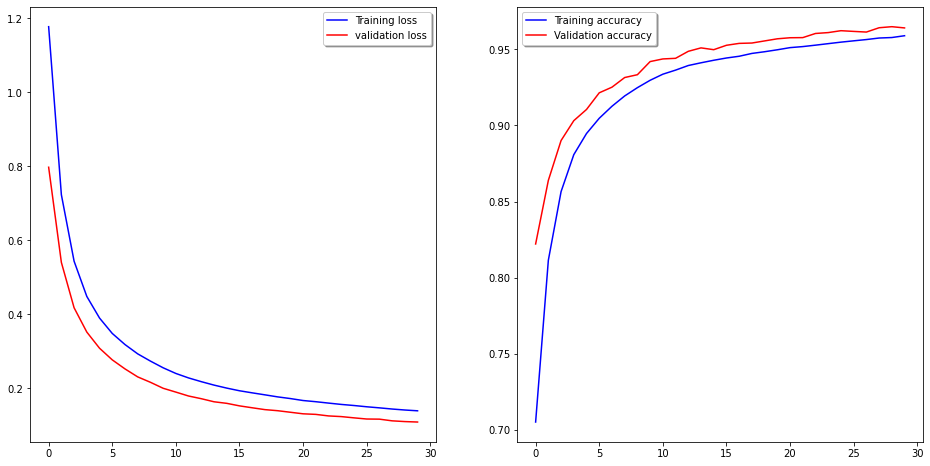

In [20]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10935226827859879
Test accuracy: 0.9641233682632446


In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11109182238578796
Test accuracy: 0.9640357494354248


In [23]:
# Classification
y_pred = model.predict(x_test)

y_pred

2519/2519 [==============================] - 5s 2ms/step


array([[7.6713320e-09, 2.9130266e-12, 1.0798046e-08, ..., 1.0838779e-08,
        5.4654407e-07, 9.2841319e-06],
       [1.6161042e-08, 7.2955239e-11, 5.0835422e-07, ..., 3.7796397e-06,
        1.7861086e-05, 6.4265064e-04],
       [1.9840083e-09, 4.9457034e-14, 2.8610360e-08, ..., 5.6752501e-08,
        1.6707002e-08, 4.1952121e-06],
       ...,
       [1.0096779e-09, 2.6002365e-08, 2.7578192e-08, ..., 3.0391470e-06,
        2.2384127e-06, 1.0824633e-05],
       [3.0592153e-07, 1.6519201e-10, 2.7249058e-07, ..., 2.1494481e-07,
        3.7953007e-06, 9.1113725e-05],
       [1.9330095e-08, 1.8605078e-11, 1.3479320e-07, ..., 5.5676001e-08,
        1.8055764e-06, 2.7606437e-05]], dtype=float32)

In [24]:
for i in range(0,len(y_pred)):
# Get the index of the maximum value in the output list
  max_index = np.argmax(y_pred[i])
  # Create a binary vector with the maximum value as 1 and other values as 0
  y_pred[i] = np.zeros(len(y_pred[i]))

  y_pred[i][max_index] = 1

In [25]:
labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [26]:
df_pred = pd.DataFrame( y_pred,columns=labels)

In [27]:
df_pred

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
original_array_pred = df_pred.idxmax(axis=1)

In [29]:
original_array_pred

0               Office|Computing
1          Living_room|Computing
2                Kitchen|Cooking
3               Office|Computing
4               Office|Computing
                  ...           
80575           Office|Computing
80576           Office|Computing
80577    Living_room|Watching_TV
80578           Office|Computing
80579           Office|Computing
Length: 80580, dtype: object

In [30]:
df_test = pd.DataFrame( y_test,columns=labels)
original_array_test = df_test.idxmax(axis=1)
original_array_test

10438            Office|Computing
256528      Living_room|Computing
125754            Kitchen|Cooking
183388           Office|Computing
198232           Office|Computing
                   ...           
280076           Office|Computing
382212           Office|Computing
267719    Living_room|Watching_TV
375555           Office|Computing
372534           Office|Computing
Length: 80580, dtype: object

In [31]:
cm = confusion_matrix(original_array_test,original_array_pred)

In [32]:
df_cm = pd.DataFrame( cm,columns=labels, index=labels)

In [33]:
df_cm

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
Bathroom|Cleaning,0,0,57,9,0,18,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
Bathroom|Showering,0,2689,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,8
Bathroom|Using_the_sink,0,414,516,2,0,0,0,0,1,0,...,2,2,0,0,0,0,0,0,0,13
Bathroom|Using_the_toilet,0,0,83,155,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,3
Bedroom|Cleaning,0,0,0,0,0,38,0,6,0,0,...,0,1,0,0,0,0,0,0,0,10
Bedroom|Dressing,0,0,0,0,0,216,20,34,0,0,...,9,0,0,0,0,0,0,0,0,16
Bedroom|Napping,0,0,0,0,0,6,2977,6,0,0,...,0,0,0,0,0,0,0,0,0,4
Bedroom|Reading,0,0,0,0,0,9,0,3273,0,0,...,0,0,0,0,0,0,0,0,0,0
Entrance|Entering,0,0,0,0,0,0,0,0,258,24,...,0,0,0,0,0,0,0,0,0,16
Entrance|Leaving,0,0,0,0,0,0,0,0,123,65,...,0,0,0,0,0,0,0,0,0,11


In [34]:
df_cm.to_csv("confusion_matrix_MLP_225_ANOVA.csv",index=True)


In [35]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96403574087863


In [36]:
# y_true and y_pred are your true and predicted labels, respectively
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

# Calculate the weighted average of precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
weights = np.sum(y_test, axis=0)
precision_weighted = np.sum(precision * weights) / np.sum(weights)
recall_weighted = np.sum(recall * weights) / np.sum(weights)
f1_score_weighted = np.sum(f1_score * weights) / np.sum(weights)

print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1 score:", f1_score_weighted)

Precision: 0.9590803999561223
Recall: 0.9640357408786301
F1 score: 0.9586992613759633


In [38]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96403574087863
